In [ ]:
#Q1:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("/content/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
binary_cols=["mainroad",	"guestroom",	"basement",	"hotwaterheating",	"airconditioning","prefarea"]
df_encoded=df.copy()
le=LabelEncoder()
df_encoded[binary_cols]=df_encoded[binary_cols].apply(le.fit_transform)
df_encoded=pd.get_dummies(df_encoded,columns=["furnishingstatus"])
df_encoded

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,False,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,True,False,False


In [ ]:
df_encoded["furnishingstatus_furnished"]=df_encoded["furnishingstatus_furnished"].replace({False:0,True:1})
df_encoded["furnishingstatus_semi-furnished"]=df_encoded["furnishingstatus_semi-furnished"].replace({False:0,True:1})
df_encoded["furnishingstatus_unfurnished"]=df_encoded["furnishingstatus_unfurnished"].replace({False:0,True:1})


<ipython-input-22-641a481a0a82>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded["furnishingstatus_semi-furnished"]=df_encoded["furnishingstatus_semi-furnished"].replace({False:0,True:1})
<ipython-input-22-641a481a0a82>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded["furnishingstatus_unfurnished"]=df_encoded["furnishingstatus_unfurnished"].replace({False:0,True:1})


In [ ]:
df_encoded

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
corr=df_encoded.corr()["price"].sort_values(ascending=False)
corr

,price
price,1.000000
area,0.535997
bathrooms,0.517545
airconditioning,0.452954
stories,0.420712
parking,0.384394
bedrooms,0.366494
prefarea,0.329777
mainroad,0.296898
guestroom,0.255517


In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

x=df_encoded[["area","bathrooms","airconditioning","stories","parking","bedrooms","prefarea"	,"mainroad"]]
x=ss.fit_transform(x)
y=df_encoded["price"]
x_t,x_test,y_t,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
model=LinearRegression()
applied=model.fit(x_t,y_t)
predicted=applied.predict(x_test)
result1=mean_squared_error(y_test,predicted)
print(result1)
result2=r2_score(y_test,predicted)
print(result2)

1907485961246.5837
0.6226215349128164


In [ ]:
for feature, coef in zip(x.columns, applied.coef_):
    print(f"{feature}: {coef}")


In [ ]:
def train_model(df):
    df_encoded = df.copy()

    binary_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

    # Fill missing values for numerical and categorical columns
    for col in df_encoded.columns:
        if df_encoded[col].dtype in [np.float64, np.int64]:
            df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mean())
        else:
            df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mode()[0])

    # Map binary yes/no columns to 1/0
    for col in binary_cols:
        df_encoded[col] = df_encoded[col].map({"yes": 1, "no": 0})

    # One-hot encode furnishing status
    df_encoded = pd.get_dummies(df_encoded, columns=["furnishingstatus"])

    # Get all furnishing columns that may appear
    furnishing_cols = ["furnishingstatus_furnished", "furnishingstatus_semi-furnished", "furnishingstatus_unfurnished"]

    # Add missing dummy columns if not present
    for col in furnishing_cols:
        if col not in df_encoded.columns:
            df_encoded[col] = 0

    feature_cols = ["area", "bathrooms", "airconditioning", "stories", "parking",
                    "bedrooms", "prefarea", "mainroad"] + furnishing_cols

    # Ensure all feature columns are present
    for col in feature_cols:
        if col not in df_encoded.columns:
            df_encoded[col] = 0

    # Fill again just in case
    df_encoded[feature_cols] = df_encoded[feature_cols].fillna(0)

    # Prepare training data
    x = df_encoded[feature_cols]
    y = df_encoded["price"]

    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)

    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=42, test_size=0.2)

    model = LinearRegression()
    model.fit(x_train, y_train)

    pred = model.predict(x_test)
    print("Mean Squared Error:", mean_squared_error(y_test, pred))
    print("R² Score:", r2_score(y_test, pred))

    return model, scaler, feature_cols, furnishing_cols


def predict_sample(model, scaler, feature_cols, furnishing_cols, new_data):
    sample = new_data.copy()

    binary_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

    for col in sample.columns:
        if sample[col].dtype in [np.float64, np.int64]:
            sample[col] = sample[col].fillna(sample[col].mean())
        else:
            sample[col] = sample[col].fillna(sample[col].mode()[0])

    for col in binary_cols:
        sample[col] = sample[col].map({"yes": 1, "no": 0})

    sample = pd.get_dummies(sample, columns=["furnishingstatus"])

    for col in furnishing_cols:
        if col not in sample.columns:
            sample[col] = 0

    for col in feature_cols:
        if col not in sample.columns:
            sample[col] = 0

    x_sample = sample[feature_cols]
    x_scaled = scaler.transform(x_sample)
    return model.predict(x_scaled)[0]
model, scaler, feature_cols, furnishing_cols = train_model(df)

sample = pd.DataFrame([{
    "area": 2200,
    "bathrooms": 2,
    "airconditioning": "yes",
    "stories": 2,
    "parking": 1,
    "bedrooms": 3,
    "prefarea": "yes",
    "mainroad": "yes",
    "guestroom": "no",
    "basement": "no",
    "hotwaterheating": "no",
    "furnishingstatus": "semi-furnished"
}])

predicted_price = predict_sample(model, scaler, feature_cols, furnishing_cols, sample)
print("Predicted Price:", predicted_price)


Mean Squared Error: 2229169358205.063
R² Score: 0.5589794483892088
Predicted Price: 4921077.581253991


<ipython-input-2-70be6470c5d4>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sender'] = sender_encoder.fit_transform(X['sender'])


K-Fold Cross-Validation Accuracy: 0.3
Confusion Matrix:
 [[0 5]
 [2 3]]


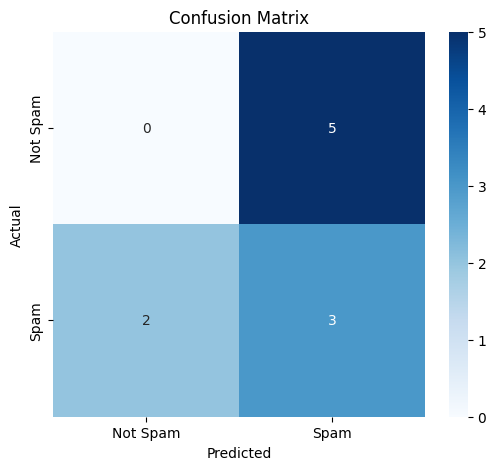

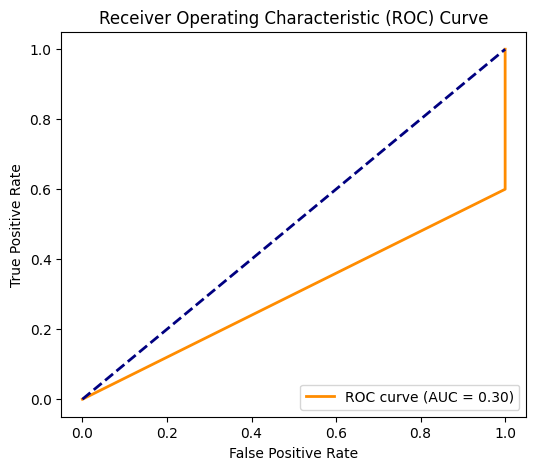

Training Accuracy: 100.00%


In [ ]:
#Q2:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict

def preprocess_and_model(df):
    """
    Preprocess the dataset, train a Decision Tree Classifier model, perform K-Fold Cross Validation,
    and evaluate the model using Confusion Matrix and ROC Curve.

    Parameters:
    df (pd.DataFrame): The dataframe containing the emails dataset with features and labels.

    Returns:
    None: Displays results of K-Fold Cross Validation, Confusion Matrix, and ROC Curve.
    """
    # Fill missing values
    df.fillna({'email_text': '', 'sender': 'unknown'}, inplace=True)

    # Optional: Add features like email length and number of links
    df['email_length'] = df['email_text'].apply(len)
    df['num_links'] = df['email_text'].str.count('http|www')

    # Features and target
    X = df[['email_text', 'email_length', 'num_links', 'sender']]
    y = df['label']

    # Encode sender
    sender_encoder = LabelEncoder()
    X['sender'] = sender_encoder.fit_transform(X['sender'])

    # TF-IDF vectorization for email text
    tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
    email_text_tfidf = tfidf.fit_transform(X['email_text'])

    # Scale numerical features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(X[['email_length', 'num_links']])

    # Combine the features
    from scipy.sparse import hstack
    X_combined = hstack([email_text_tfidf, scaled_features])

    # Initialize the Decision Tree Classifier model
    dt_model = DecisionTreeClassifier(random_state=42)

    # K-Fold Cross Validation setup (5-fold)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Use cross_val_predict for cross-validation predictions
    y_pred = cross_val_predict(dt_model, X_combined, y, cv=kfold)

    # Accuracy score for cross-validation predictions
    accuracy = accuracy_score(y, y_pred)
    print("K-Fold Cross-Validation Accuracy:", accuracy)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    print("Confusion Matrix:\n", cm)

    # Plot Confusion Matrix using Seaborn
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Model Training Accuracy (on full dataset)
    dt_model.fit(X_combined, y)
    training_accuracy = dt_model.score(X_combined, y) * 100
    print(f"Training Accuracy: {training_accuracy:.2f}%")

# Load your dataset (Make sure the 'emails.csv' path is correct)
df = pd.read_csv("sample_emails.csv")  # Replace with your actual path

# Call the function
preprocess_and_model(df)



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack

def train_model(df):
    # Fill missing values
    # Fill missing values
    df.fillna({'email_text': '', 'sender': 'unknown'}, inplace=True)

#  Make sure 'unknown' is part of the label encoder classes
    if 'unknown' not in df['sender'].values:
        df.loc[len(df)] = {'email_text': '', 'sender': 'unknown', 'label': 0}  # Dummy row

# Optional: Add features
    df['email_length'] = df['email_text'].apply(len)
    df['num_links'] = df['email_text'].str.count('http|www')

# Features and target
    X = df[['email_text', 'email_length', 'num_links', 'sender']]
    y = df['label']

# Avoid SettingWithCopyWarning
    X = X.copy()

# Fit sender encoder now that 'unknown' is guaranteed present
    sender_encoder = LabelEncoder()
    X['sender'] = sender_encoder.fit_transform(X['sender'])


    # TF-IDF vectorizer
    tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
    email_text_tfidf = tfidf.fit_transform(X['email_text'])

    # Standardize numerical features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(X[['email_length', 'num_links']])

    # Combine features
    X_combined = hstack([email_text_tfidf, scaled_features])

    # Initialize model
    dt_model = DecisionTreeClassifier(random_state=42)

    # K-Fold Cross Validation
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred = cross_val_predict(dt_model, X_combined, y, cv=kfold)

    # Evaluation
    print("K-Fold Cross-Validation Accuracy:", accuracy_score(y, y_pred))
    cm = confusion_matrix(y, y_pred)
    print("Confusion Matrix:\n", cm)

    # Confusion Matrix Plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    # Fit on full data for deployment
    dt_model.fit(X_combined, y)
    training_accuracy = dt_model.score(X_combined, y) * 100
    print(f"Training Accuracy: {training_accuracy:.2f}%")

    return dt_model, tfidf, scaler, sender_encoder


def predict_sample(model, tfidf, scaler, sender_encoder, sample_row):
    """
    Predicts whether a single sample email is spam or not.
    """
    email_text = sample_row['email_text']
    email_length = len(email_text)
    num_links = email_text.count('http') + email_text.count('www')

    sender = sample_row['sender']

    # Handle unseen sender by assigning 'unknown' if not in training set
    if sender not in sender_encoder.classes_:
        sender = 'unknown'

    # Re-transform sender using label encoder
    sender_encoded = sender_encoder.transform([sender])[0]

    # TF-IDF transform
    email_text_tfidf = tfidf.transform([email_text])

    # Scale numeric features
    scaled = scaler.transform([[email_length, num_links]])

    # Combine all features
    from scipy.sparse import hstack
    combined = hstack([email_text_tfidf, scaled])

    # Predict
    prediction = model.predict(combined)[0]
    return "Spam" if prediction == 1 else "Not Spam"



K-Fold Cross-Validation Accuracy: 0.2727272727272727
Confusion Matrix:
 [[0 6]
 [2 3]]


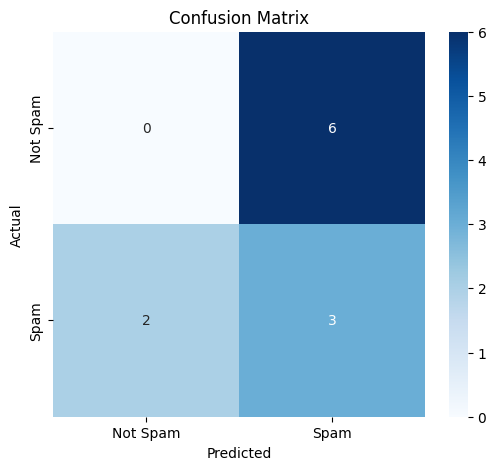

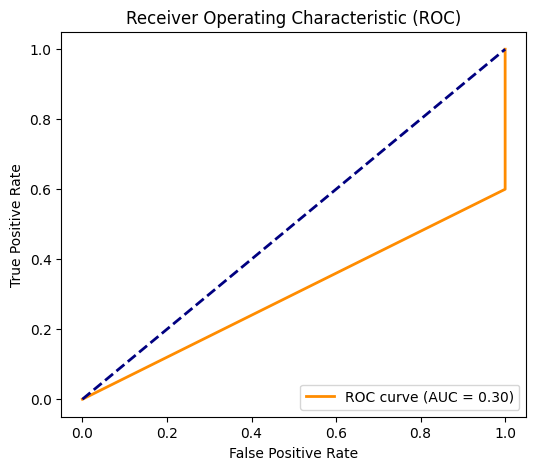

Training Accuracy: 100.00%
Prediction for sample row: Not Spam


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Load the dataset
df = pd.read_csv("sample_emails.csv")

# Train the model and preprocessors
model, tfidf, scaler, sender_encoder = train_model(df)

# Predict a new sample email
sample = {
    'email_text': "Congratulations! You've won a prize. Click http://win-now.com to claim.",
    'sender': "promo@scam.com"
}
sample_row = pd.Series(sample)

result = predict_sample(model, tfidf, scaler, sender_encoder, sample_row)
print("Prediction for sample row:", result)


In [ ]:
#q3:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             r2_score, mean_absolute_error, mean_squared_error, max_error,
                             explained_variance_score, balanced_accuracy_score,
                             roc_auc_score, roc_curve)

# Load the dataset
df = pd.read_csv('customer_data.csv')

# EDA
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values (Imputation with median for numerical columns)
df.fillna(df.median(), inplace=True)

# Outlier detection and removal using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualize distribution of features
plt.figure(figsize=(10, 8))

# Histograms for each feature
for i, column in enumerate(['Total_Spending', 'Age', 'Num_Visits', 'Purchase_Frequency']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[column], kde=True, color='skyblue', bins=15)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()

# Boxplot for identifying outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Total_Spending', 'Age', 'Num_Visits', 'Purchase_Frequency']])
plt.title('Boxplot of Features')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Total_Spending', 'Age', 'Num_Visits', 'Purchase_Frequency']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Pairplot to explore feature relationships
sns.pairplot(df[['Total_Spending', 'Age', 'Num_Visits', 'Purchase_Frequency', 'Label']], hue='Label', markers=["o", "s"])
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

# Visualize target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=df, palette='pastel')
plt.title('Target Variable Distribution')
plt.show()

# Feature Scaling
features = ['Total_Spending', 'Age', 'Num_Visits', 'Purchase_Frequency']
X = df[features]
y = df['Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize SVM with RBF kernel
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(svm_model, X_scaled, y, cv=skf)

print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

# Train the model
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Max Error:", max_error(y_test, y_pred))
print("Explained Variance Score:", explained_variance_score(y_test, y_pred))
print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='SVM (AUC = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
